# NUISANCE2

NUISANCE2 contains a wealth of published measurements. These will eventually be converted to HepData format and uploaded for preservation, but as a stopgap we supply a NUISANCE2 interface. This interface will not work seamlessly for every sample in NUISANCE2, some are snowflakes. If you find a sample that doesn't work, please get in touch and we can try to prioritise it's translation to the HepData-native format.

The interface is not designed to be fast, fully functional, or ergnomic, its just designed to give some access to NUISANCE2 Measurements in NUISANCE3. Below we show and example of reading a number of projection functions from a single MicroBooNE meausrement. Each projection corresponds to a different record, each record instance only produces a single table type, which corresponds to the NUISANCE2 `MeasurementBase` instance that the Record plugin is set up to serve. If you want to use multiple projections from a single NUISANCE2 `MeasurementBase` subclass, you will need a record for each projection. This is due to design differences between NUISANCE2 and NUISANCE3.

In [1]:
import pyNUISANCE as pn

rfact = pn.RecordFactory()

Nuisance: Neutrino Interaction Systematics ANalyser by Comparing Experiments  -- Fit and compare.
[ NUISANCE ]: Loading DEFAULT settings from : /root/software/NUISANCEMC/nuisance/build/Linux/parameters/config.xml
[ NUISANCE ]: Finished nuisconfig.


In [2]:
rec = rfact.make({"type": "nuisance2", "name":"MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu"})

[LOG Fitter]:  : SampleList.cxx::LoadPlugins[l. 448] : Searching for dynamic sample manifests in: /root/software/NUISANCEMC/eventinput/notebooks/
[LOG Fitter]:  : SampleList.cxx::DynamicSampleFactory[l. 404] : Loaded 0 from 0 shared object libraries.
enetered fileMicroBooNE_CC1Mu1p_XSec_1D_nu.cc
string description: MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu sample.
Target: Ar
Flux: BNB FHC numu
Signal: CC1Mu1p

[LOG Sample]:--  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data//MicroBooNE/CC1Mu1p/All_XSecs_Combined_v08_00_00_52.root;FullUnc_DeltaPTPlot
[LOG Sample]:--  : Measurement1D.cxx::SetCovarFromRootFile[l. 302] : Reading covariance from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data//MicroBooNE/CC1Mu1p/All_XSecs_Combined_v08_00_00_52.root;UnfCov_DeltaPTPl

In [3]:
tbl = rec.table("")

In [4]:
evs = pn.EventSource("dune_argon_sf_10mega.nuwro.pb.gz")
if not evs:
    print("Error: failed to open input file")

In [5]:
fg = pn.FrameGen(evs,10000).limit(1E6)

fg.add_double_columns(["dpt"], tbl.project)

print(fg.first())

 --------------------------
 | evt# | cvw |       dpt |
 --------------------------
 |    0 |   1 | 3.736e+09 |
 |    1 |   1 | 3.736e+09 |
 |    2 |   1 | 3.736e+09 |
 |    3 |   1 | 3.736e+09 |
 |    4 |   1 | 3.736e+09 |
 |    5 |   1 | 3.736e+09 |
 |    6 |   1 | 3.736e+09 |
 |    7 |   1 | 3.736e+09 |
 |    8 |   1 | 3.736e+09 |
 |    9 |   1 | 3.736e+09 |
 |   10 |   1 | 3.736e+09 |
 |   11 |   1 | 3.736e+09 |
 |   12 |   1 | 3.736e+09 |
 |   13 |   1 | 3.736e+09 |
 |   14 |   1 | 3.736e+09 |
 |   15 |   1 | 3.736e+09 |
 |   16 |   1 | 3.736e+09 |
 |   17 |   1 | 3.736e+09 |
 |   18 |   1 | 3.736e+09 |
 |   19 |   1 | 3.736e+09 |
 |   20 |   1 | 3.736e+09 |
 |  ... | ... |       ... |
 --------------------------


If we do filter things, then it is easier to check that things look sensible

In [6]:
fg.filter(tbl.select)
nf = fg.first()
print(nf)

 ------------------------
 | evt# | cvw |     dpt |
 ------------------------
 |   36 |   1 |  0.3136 |
 |   65 |   1 |   0.344 |
 |   73 |   1 | 0.07907 |
 |  146 |   1 |  0.6717 |
 |  149 |   1 |  0.1863 |
 |  154 |   1 |  0.1642 |
 |  180 |   1 |  0.5885 |
 |  201 |   1 |  0.2636 |
 |  213 |   1 |  0.2866 |
 |  313 |   1 |  0.1708 |
 |  354 |   1 |  0.1381 |
 |  401 |   1 |  0.9415 |
 |  431 |   1 |   0.195 |
 |  435 |   1 |  0.6599 |
 |  500 |   1 | 0.09417 |
 |  521 |   1 | 0.08027 |
 |  574 |   1 |  0.1907 |
 |  641 |   1 |  0.7804 |
 |  712 |   1 |  0.1109 |
 |  713 |   1 |  0.4089 |
 |  730 |   1 | 0.07167 |
 |  ... | ... |     ... |
 ------------------------


We can get a copy of the measurement binning as well

In [7]:
myhist = tbl.blueprint.mc
myhist.reset()

nf = fg.first()
while nf.rows() > 0:
    print("Processing %s rows" % nf.rows())
    for i in range(nf.rows()):
        myhist.fill(nf.table[i][2],nf.table[i][1])
    nf = fg.next()
print(myhist)

Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 6131 rows
 ----------------------
 | bin |   mc |   err |
 ----------------------
 |   0 | 1560 |  39.5 |
 |   1 | 4187 | 64.71 |
 |   2 | 5621 | 74.97 |
 |   3 | 5282 | 72.68 |
 |   4 | 3735 | 61.11 |
 |   5 | 2539 | 50.39 |
 |   6 | 1838 | 42.87 |
 |   7 | 1637 | 40.46 |
 |   8 | 2010 | 44.83 |
 |   9 | 1974 | 44.43 |
 |  10 | 1977 | 44.46 |
 |  11 | 1348 | 36.72 |
 |  12 | 1398 | 37.39 |
 ----------------------


In [8]:
#make a differential xs prediction by dividing out the bin widths
mypred = myhist.finalise(True)

#and normalizing by the flux-averaged total cross section
mypred.values = mypred.values * (nf.fatx()/nf.sumw()) * (1E-36)
mypred.errors = mypred.errors * (nf.fatx()/nf.sumw()) * (1E-36)

print(mypred)
print(tbl.blueprint.data)

 -------------------------------
 | bin |        mc |       err |
 -------------------------------
 |   0 | 3.296e-36 | 8.344e-38 |
 |   1 | 8.845e-36 | 1.367e-37 |
 |   2 | 1.187e-35 | 1.584e-37 |
 |   3 | 1.116e-35 | 1.535e-37 |
 |   4 |  7.89e-36 | 1.291e-37 |
 |   5 | 5.364e-36 | 1.064e-37 |
 |   6 | 3.883e-36 | 9.057e-38 |
 |   7 | 3.458e-36 | 8.547e-38 |
 |   8 | 3.033e-36 | 6.765e-38 |
 |   9 | 2.606e-36 | 5.866e-38 |
 |  10 | 2.088e-36 | 4.697e-38 |
 |  11 | 1.424e-36 | 3.878e-38 |
 |  12 | 9.845e-37 | 2.633e-38 |
 -------------------------------
 ----------------------------------
 | bin | MicroBooNE_$ |       err |
 ----------------------------------
 |   0 |    1.762e-37 | 2.591e-38 |
 |   1 |    3.127e-37 | 3.467e-38 |
 |   2 |    3.899e-37 | 3.893e-38 |
 |   3 |    3.659e-37 | 3.668e-38 |
 |   4 |    2.661e-37 | 2.908e-38 |
 |   5 |    1.544e-37 | 2.285e-38 |
 |   6 |    1.157e-37 | 2.245e-38 |
 |   7 |    1.086e-37 | 2.103e-38 |
 |   8 |    9.585e-38 | 1.658e-38 |
 |   9 

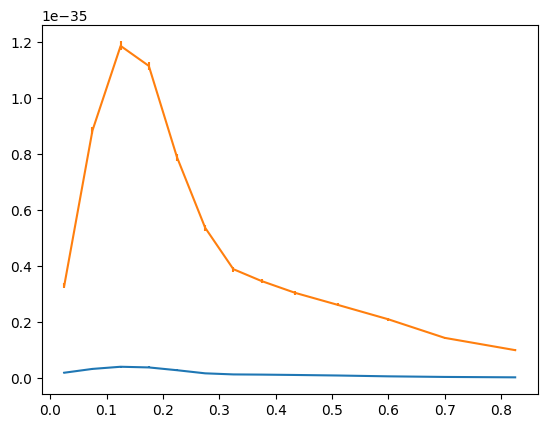

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins),
             tbl.blueprint.data.values[:,0],yerr=tbl.blueprint.data.errors[:,0])
plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins),
             mypred.values[:,0],yerr=mypred.errors[:,0])
plt.show()

# Lots of projections

In [10]:
import pyNUISANCE as pn

rfact = pn.RecordFactory()

records = []
tables = []

measurements = [
  ("DeltaPT_nu","MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu"),
  ("DeltaAlphaT_nu","MicroBooNE_CC1Mu1p_XSec_1DDeltaAlphaT_nu"),
  ("DeltaPhiT_nu","MicroBooNE_CC1Mu1p_XSec_1DDeltaPhiT_nu"),
  ("MuonCosTheta_nu","MicroBooNE_CC1Mu1p_XSec_1DMuonCosTheta_nu"),
  ("ProtonCosTheta_nu","MicroBooNE_CC1Mu1p_XSec_1DProtonCosTheta_nu"),
  ("MuonMomentum_nu","MicroBooNE_CC1Mu1p_XSec_1DMuonMomentum_nu"),
  ("DeltaPn_nu","MicroBooNE_CC1Mu1p_XSec_1DDeltaPn_nu"),
  ("DeltaPtx_nu","MicroBooNE_CC1Mu1p_XSec_1DDeltaPtx_nu"),
  ("DeltaPty_nu","MicroBooNE_CC1Mu1p_XSec_1DDeltaPty_nu"),
  ("ECal_nu","MicroBooNE_CC1Mu1p_XSec_1DECal_nu")
]

for ptag, mname in measurements:
  records.append(rfact.make({"type": "nuisance2", "name":mname}))
  tables.append((ptag, records[-1].table("")))

enetered fileMicroBooNE_CC1Mu1p_XSec_1D_nu.cc
string description: MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu sample.
Target: Ar
Flux: BNB FHC numu
Signal: CC1Mu1p

[LOG Sample]:--  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data//MicroBooNE/CC1Mu1p/All_XSecs_Combined_v08_00_00_52.root;FullUnc_DeltaPTPlot
[LOG Sample]:--  : Measurement1D.cxx::SetCovarFromRootFile[l. 302] : Reading covariance from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data//MicroBooNE/CC1Mu1p/All_XSecs_Combined_v08_00_00_52.root;UnfCov_DeltaPTPlot
[LOG Sample]:--  : Measurement1D.cxx::FinaliseMeasurement[l. 562] : Finalising Measurement: MicroBooNE_CC1Mu1p_XSec_1DDeltaPT_nu
enetered fileMicroBooNE_CC1Mu1p_XSec_1D_nu.cc
string description: MicroBooNE_CC1Mu1p_XSec_1DDeltaAlphaT_nu sample.
Targ

Now that we have loaded all of the `MeasurementBase` instances that we want to use, we can set up a FrameGen to produce them. We can filter based on the union of selection functions (in this example, they are all the same), but we don't have to. The `NUISANCE2Record` plugin will check if an event passes selection before calling the NUISANCE2 projection function, and if it does not pass, it will return a vector of missing datum flags.

In [11]:
fg = pn.FrameGen(evs,10000).limit(1E6)
fg.filter(tables[0][1].select)

for ptag, tbl in tables:
  fg.add_double_columns([ptag,], tbl.project)

print(fg.first())

 ---------------------------------------------------------------------------------------------------------------------------------------------------------
 | evt# | cvw | DeltaPT_nu | DeltaAlphaT$ | DeltaPhiT_nu | MuonCosThet$ | ProtonCosTh$ | MuonMomentu$ | DeltaPn_nu | DeltaPtx_nu | DeltaPty_nu | ECal_nu |
 ---------------------------------------------------------------------------------------------------------------------------------------------------------
 |   36 |   1 |     0.3136 |        87.25 |        54.68 |     -0.02964 |       0.9187 |        0.207 |     0.5192 |     -0.2063 |     -0.2063 |  0.6848 |
 |   65 |   1 |      0.344 |        120.1 |        49.19 |       0.8523 |       0.2707 |       0.8211 |     0.4923 |      0.2274 |      0.2274 |  0.9529 |
 |   73 |   1 |    0.07907 |        78.64 |        12.58 |       0.8366 |       0.1817 |       0.6056 |     0.3081 |    -0.00776 |    -0.00776 |  0.7221 |
 |  146 |   1 |     0.6717 |        130.5 |        111.3 |      -0.359

In [12]:
for _, tbl in tables:
    tbl.blueprint.mc.reset()

nf = fg.first()
while nf.rows() > 0:
    print("Processing %s rows" % nf.rows())
    for i in range(nf.rows()):
        for j,(_, tbl) in enumerate(tables):
            tbl.blueprint.mc.fill(nf.table[i][2+j],nf.table[i][1])
    nf = fg.next()

Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 6131 rows


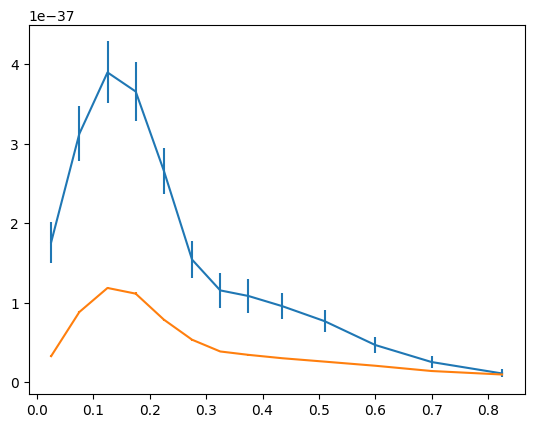

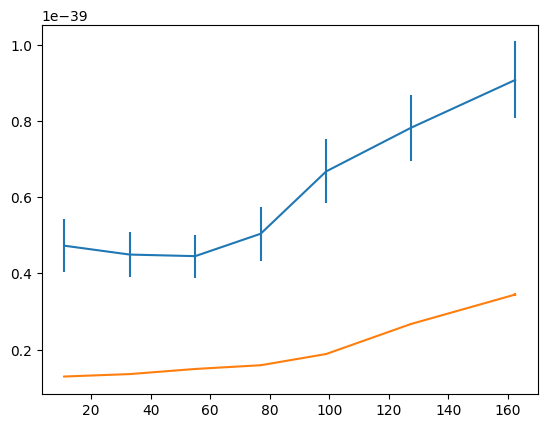

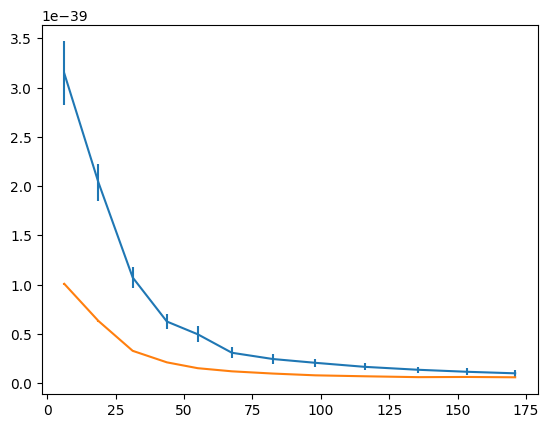

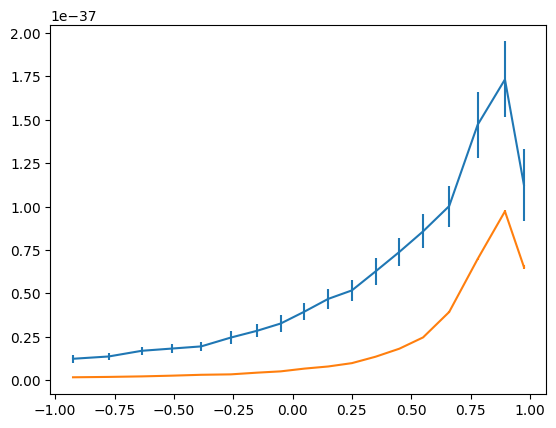

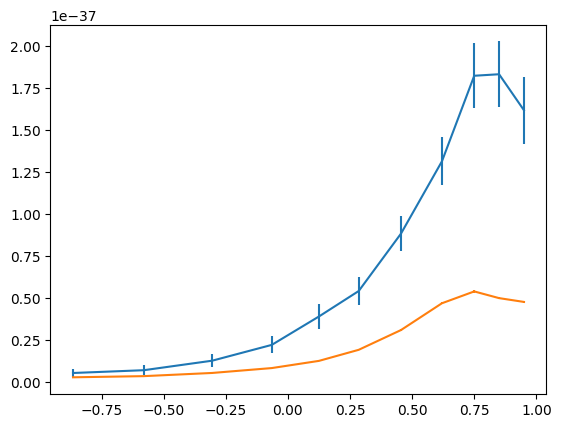

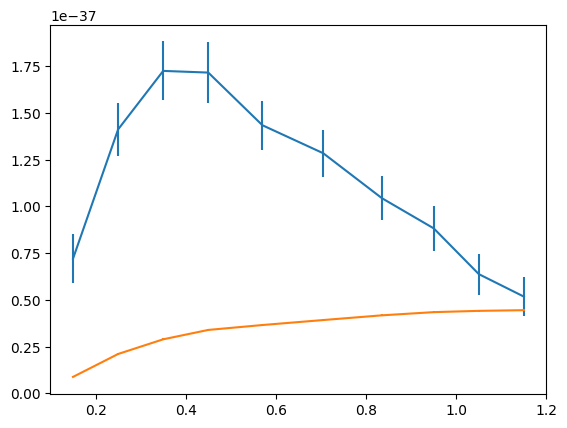

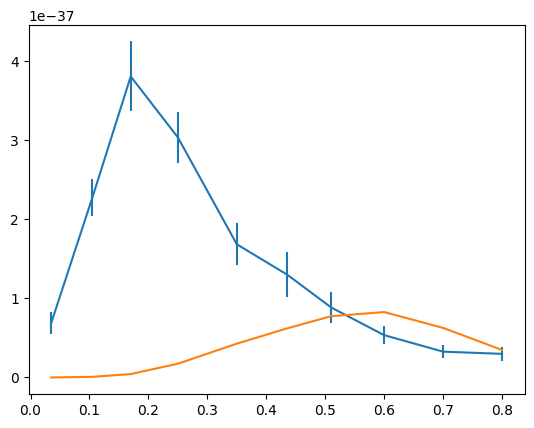

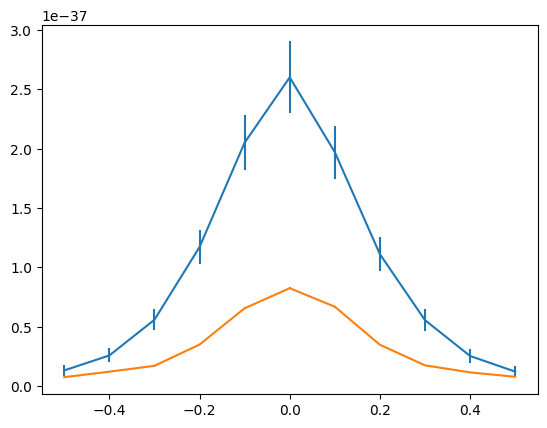

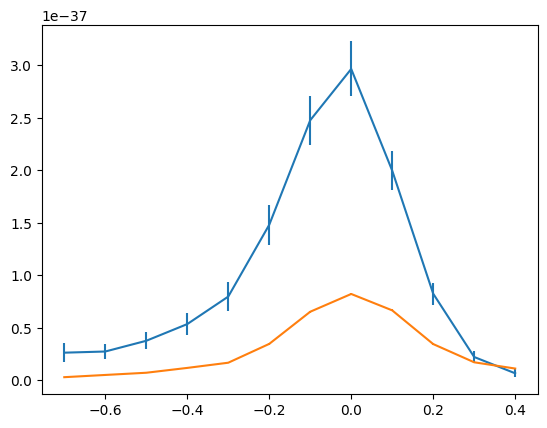

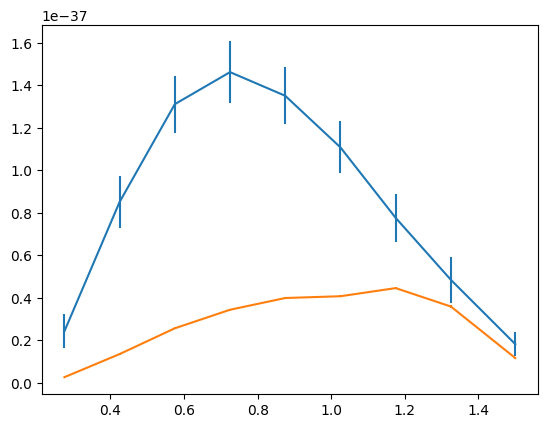

In [13]:
for j,(_, tbl) in enumerate(tables):
    #make a differential xs prediction by dividing out the bin widths
    mypred = tbl.blueprint.mc.finalise(True)

    #and normalizing by the flux-averaged total cross section
    mypred.values = mypred.values * (nf.fatx()/nf.sumw()) * (1E-36)
    mypred.errors = mypred.errors * (nf.fatx()/nf.sumw()) * (1E-36)
    
    plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins),
                 tbl.blueprint.data.values[:,0],yerr=tbl.blueprint.data.errors[:,0])
    plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins),
                 mypred.values[:,0],yerr=mypred.errors[:,0])
    plt.show()